# Understand Seattle Airbnb Data

In this project, the Seattle airbnb data was taken for analysis with CRISP-DM process including:

- Business understanding
- Data understanding
- Data preparation
- Data modeling
- Data evaluation
- Deployment

## **Data**

Data in this project was downloaded from Udacity course 1 project and includes:

- calendar.csv
- listing.csv
- review.csv

## **Goal of the project**

By analyzing the given dataset, I hope to answer three major questions:

- What is the most expensive month to book accomodation in Seattle?
- Does availability contribute to the price?
- What contributes to a house listed with high price?

## **Data understanding: A look at the data**

In this section, I took a look at what each dataset consists of.

In [4]:
# Install necessary libraries and import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import os
import seaborn as sns
%matplotlib inline

filepath = os.getcwd()
#df_calendar = pd.read_csv((filepath+'/calendar.csv'))
df_calendar = pd.read_csv(('calendar.csv'))
df_listings = pd.read_csv(filepath+'/listings.csv')
df_reviews = pd.read_csv(filepath+'/reviews.csv')


In [2]:
# basic info
print(df_calendar.info())
print(' ')
print(df_listings.info())
print(' ')
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                  

In [3]:
# number of columns with no missing values in each dataset
calendar_no_nulls = set(df_calendar.columns[df_calendar.isnull().mean()==0])
print("In 'calendar.csv', {} have no missing values".format(calendar_no_nulls))

listings_no_nulls = set(df_listings.columns[df_listings.isnull().mean()==0])
print("In 'listings.csv', {} have no missing values".format(listings_no_nulls))

reviews_no_nulls = set(df_reviews.columns[df_reviews.isnull().mean()==0])
print("In 'reviews.csv', {} have no missing values".format(reviews_no_nulls))

In 'calendar.csv', {'available', 'listing_id', 'date'} have no missing values
In 'listings.csv', {'calendar_updated', 'state', 'accommodates', 'calendar_last_scraped', 'bed_type', 'requires_license', 'description', 'city', 'room_type', 'street', 'scrape_id', 'availability_90', 'availability_365', 'require_guest_profile_picture', 'price', 'last_scraped', 'host_verifications', 'neighbourhood_group_cleansed', 'calculated_host_listings_count', 'smart_location', 'latitude', 'availability_60', 'id', 'guests_included', 'market', 'host_url', 'experiences_offered', 'longitude', 'minimum_nights', 'number_of_reviews', 'require_guest_phone_verification', 'instant_bookable', 'extra_people', 'picture_url', 'listing_url', 'host_id', 'neighbourhood_cleansed', 'availability_30', 'is_location_exact', 'has_availability', 'cancellation_policy', 'amenities', 'jurisdiction_names', 'country_code', 'maximum_nights', 'name', 'country'} have no missing values
In 'reviews.csv', {'reviewer_name', 'listing_id', 'i

In [46]:
# Which columns have the most missing values
cal_most_missing_cols = set(df_calendar.columns[df_calendar.isnull().mean() > 0.75])
print("In 'calendar.csv', {} have 75% or more missing values".format(cal_most_missing_cols))

lis_most_missing_cols = set(df_listings.columns[df_listings.isnull().mean() > 0.75])
print("In 'listings.csv', {} have 75% or more missing values".format(lis_most_missing_cols))

rev_most_missing_cols = set(df_reviews.columns[df_reviews.isnull().mean() > 0.75])
print("In 'reviews.csv', {} have 75% or more missing values".format(rev_most_missing_cols))

In 'calendar.csv', set() have 75% or more missing values
In 'listings.csv', {'license', 'square_feet'} have 75% or more missing values
In 'reviews.csv', set() have 75% or more missing values


In the following section, I am going to take a close look at each dataset separately. Let's start with the **calendar.csv**.

From the info analysis above, we know that calendar.csv includes information such as listing_id (which can be used as an index to match the information in the other two datasets), date, availability and price. 

In [5]:
print(df_calendar.head())

df_calendar.describe()

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


Since date is time data, availability is boolean and price is string, only listing_id is described which is not very useful. For future analysis, we need to convert the string data in price into numerical data.

In [21]:
def convert_price_to_float(price):
    """
    Remove $ sign and convert str to float
    Input: string price
    Ouput: float price
    """

    try:
        if ',' in price:
            price = price.replace(',','')
            price = price[1:]
            return float(str(price))
    except:
        return price


df_calendar['price'] = df_calendar['price'].apply(lambda x: convert_price_to_float(x))

df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Text(0, 0.5, 'Count')

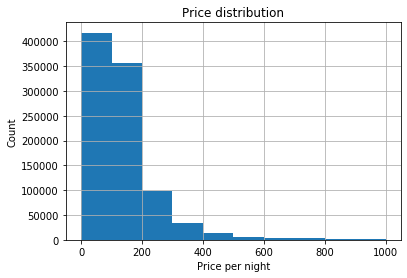

In [26]:
# check the price distribution
df_calendar.price.hist();
plt.title('Price distribution')
plt.xlabel('Price per night')
plt.ylabel('Count')

In [22]:
df_calendar.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.199039
std,2.962274e+06,101.387024
min,3.335000e+03,0.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,999.000000


Now that the price data is cleaned, we know the basic statistics of listed house price. Let's move on the take a look at the listing data. Since there are too many columns, I started with numerical data and then categorical data.

In [171]:
list_num = df_listings.select_dtypes(include=['int','float'])
print(list_num.describe())
print('There are {} features'.format(list_num.shape[1]))

                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

Text(0, 0.5, 'Counts')

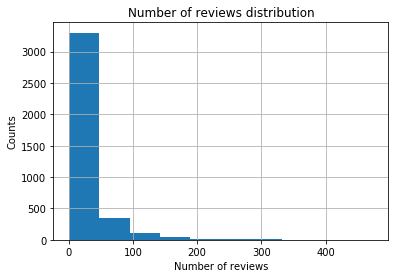

In [27]:
list_num.number_of_reviews.hist();
plt.title('Number of reviews distribution')
plt.xlabel('Number of reviews')
plt.ylabel('Counts')

In [170]:
list_cat = df_listings.select_dtypes(include=['object'])
print('There are {} features that are categorical.'.format(list_cat.shape[1]))

There are 62 features that are categorical.


In [39]:
room_type = list_cat.room_type.value_counts()
room_type

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [43]:
neighbourhood = list_cat.neighbourhood.value_counts()
print('There are {} neighborhoods in the data.'.format(neighbourhood.shape[0]))

There are 81 neighborhoods in the data.


Something we learned from the data:

- There are 30 numerical features and 62 categorical features in Listing. 
- There are more than 75% of data missing in 'license' and 'square_feet'.
- Most of the prices in the calendar.csv are between 0-200 dollars per night.
- Most of listing have less than 100 reviews.
- Most of the listings are entire home/apartment and there are 81 neighborhoods.

Features such as price, weekly_price, monthly_price, security_deposit, cleaning_fee are string instead of numerics that need to be converted. The values in 'price' in listings.csv are the same as that in calendar.csv. Now let's take a look at the **review data**.

In [47]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


The reviews.csv contains six columns of listing ID, ID, date, reviewer ID, reviewer name and comments.

## **Data Preparation**

In order to model and make prediction, we need to do the following:

- decide on columns of interest and set up a dataframe consisting of the features of interest
- convert price data into numeric data in listings.cvs (already done in previous section) and the date column from string to datetime in calendar.csv.

In [51]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


Since we are predicting the price per night, rows with missing prices can be dropped.

In [145]:
df_cal_nonull = df_calendar.dropna(subset=['price'],axis=0)
df_cal_nonull.price.isnull().sum()   # to make sure all NaN prices were dropped

0

In [146]:
df_cal_nonull.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.199039
std,2.974821e+06,101.387024
min,3.335000e+03,0.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,999.000000


In [147]:
# Now let's add day, month and year to the dataframe as numerical values
#df_cal_nonull = df_cal_nonull.drop('available',axis=1)
df_cal_nonull['day'], df_cal_nonull['month'], df_cal_nonull['year'] = df_cal_nonull.date.dt.day, df_cal_nonull.date.dt.month, df_cal_nonull.date.dt.year
#df_cal_nonull = df_cal_nonull.drop('date', axis=1)
df_cal_nonull.head()

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,t,85.0,4,1,2016
1,241032,2016-01-05,t,85.0,5,1,2016
9,241032,2016-01-13,t,85.0,13,1,2016
10,241032,2016-01-14,t,85.0,14,1,2016
14,241032,2016-01-18,t,85.0,18,1,2016


### **Question 1: what is the most expensive month to book accomodation on Airbnb in Seattle?**

Text(0, 0.5, 'Price')

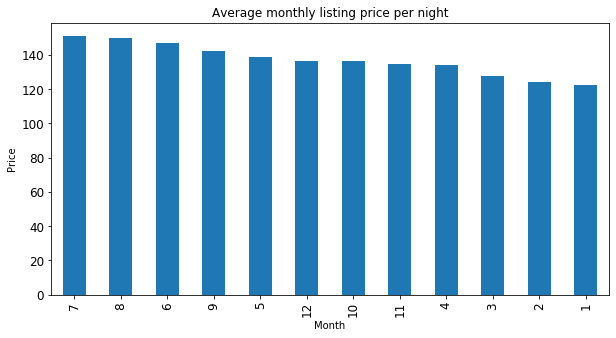

In [403]:
# Let's compare the average price in each month
price_avg_month = df_cal_nonull.groupby('month').mean()['price'].sort_values(ascending=False)
price_avg_month.plot(kind='bar', figsize= [10,5], fontsize =12, legend=False);
plt.title('Average monthly listing price per night')
plt.xlabel('Month')
plt.ylabel('Price')

Conclusion:

- We can see from the above table that the listing price is the highest in summer time, especially in July, August and June, followed by the month that before and after the summer season such as September and May. The listing price is lowest in the coldest season such as January and February.

Now let's consider both calendar.csv and listing.csv to find out the factors that attribute to the price of the house.

### **Questions 2: Does availability contribute to the price?**

In [149]:
# first let's turn 'available' into boolean
df_cal_nonull['available'][df_cal_nonull['available']=='t'] = 1
df_cal_nonull['available'][df_cal_nonull['available']=='f'] = 0
df_cal_nonull.head()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lijialing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,1,85.0,4,1,2016
1,241032,2016-01-05,1,85.0,5,1,2016
9,241032,2016-01-13,1,85.0,13,1,2016
10,241032,2016-01-14,1,85.0,14,1,2016
14,241032,2016-01-18,1,85.0,18,1,2016


In [154]:
# Let's compare the trend of availability and price for each month.
avail_per_day = df_cal_nonull.groupby('date').count()
avail_per_day = avail_per_day['available']
daily_price = df_cal_nonull.groupby('date').mean()['price']


Text(0.5, 1.0, 'Price vs. availability')

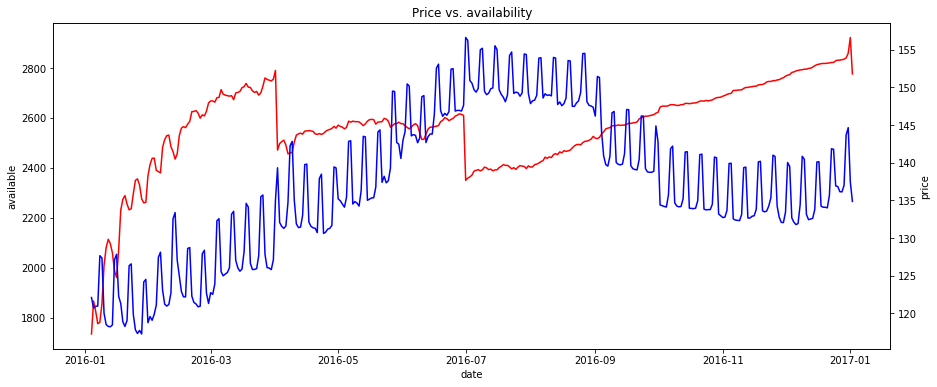

In [160]:
# plot
f, ax = plt.subplots(figsize=(15,6))
plot1 = sns.lineplot(x = avail_per_day.index, y = avail_per_day, color='r')

ax2 = ax.twinx()
plot2 = sns.lineplot(x = daily_price.index, y = daily_price, color='b')

ax.set_title('Price vs. availability')

Conclusion:

- The red line corresponds to the availability while the blue line corresponds to the price. The availability is roughly separated into three seasons: one between 01/2016-04/2016 when the availability increases over time; one between 04/2016-07/2016 when the availability stays unchanged; one between 07/2016-01/2017 when the availability increases again.
- Roughly after 07/2016, the price and availability are anticorrelated meaning that the price goes down with the increasing availability. Interestingly, the price and availability before 04/2016 seem to increase together.

### **Question 3: What contributes to a house listed with high price?**

In order to use the data to build model, we need to:

- Clean useless and redundant columns, remove columns with more than 75% missing values
- Impute missing values in columns that contain less than 75% missing values
- Create dummy values/encode for categorical columns

**First let's remove columns with more than 75% missing values, wichi is 'licence' and 'square_feet'.**

In [168]:
list_null_rem = df_listings.drop(columns=['license','square_feet'], axis=1)
list_null_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Next step: remove redundant columns**

In [354]:
list_clean = list_null_rem.drop(columns=['host_neighbourhood','neighbourhood','neighbourhood_group_cleansed','host_total_listings_count'])
list_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Next step, we impute missing values in columns that contain numeric values.**

In [355]:
list_clean_num = list_clean.select_dtypes(include=['float','int'])
col_with_null = list(list_clean_num.columns[list_clean_num.isnull().sum()>0])
col_with_null

['host_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [356]:
# fill in the null with column mean
# We do not want to simply remove data for certain columns when only small amount of data is missing and it would
# be a shame to just delete the whole row or column of data.
fill_mean = lambda col: col.fillna(col.mean())

fill_list_clean_num = list_clean_num.apply(fill_mean, axis=0)

# to make sure all NaN values are filled
fill_list_clean_num.columns[fill_list_clean_num.isnull().sum()>0]


Index([], dtype='object')

**Next, let's deal with the categorical or text column.**

- Convert price, weekly_price, monthly_price, security_deposit and cleaning_fee, host rates to numbers.
- Encode columns to 0 if NaN, 1 if description or texts exist.
- Convert t/f value to boolean (0 or 1), for example, host_verifications, host_has_profile_pic, host_identity_verified, is_location_exact, extra_people, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification.

In [357]:
# convert prices and rate to numbers
def convert_price_to_float_2(price):
    """
    Remove $ sign and convert str to float
    Input: string price
    Ouput: float price
    """

    try:
        if '$' in price:
            price = price.replace(',','')
            price = price[1:]
            return float(str(price))
    except:
        return price

def convert_percent_to_float(percent):
    """
    Remove $ sign and convert str to float
    Input: string price
    Ouput: float price
    """

    try:
        if '%' in percent:
            percent = percent.replace('%','')
            return float(str(percent))/100
    except:
        return percent

fill_list_clean_num['price'] = list_clean['price'].apply(lambda x: convert_price_to_float_2(x))
fill_list_clean_num['monthly_price'] = list_clean['monthly_price'].apply(lambda x: convert_price_to_float_2(x))
fill_list_clean_num['security_deposit'] = list_clean['security_deposit'].apply(lambda x: convert_price_to_float_2(x))
fill_list_clean_num['cleaning_fee'] = list_clean['cleaning_fee'].apply(lambda x: convert_price_to_float_2(x))
fill_list_clean_num['host_response_rate'] = list_clean['host_response_rate'].apply(lambda x: convert_percent_to_float(x))
fill_list_clean_num['host_acceptance_rate'] = list_clean['host_acceptance_rate'].apply(lambda x: convert_percent_to_float(x))


In [358]:
# fill in new missing values

fill_list_clean_num = fill_list_clean_num.apply(fill_mean, axis=0)
print(fill_list_clean_num.isnull().mean())  # make sure no missing values
fill_list_clean_num.head()


id                                0.0
scrape_id                         0.0
host_id                           0.0
host_listings_count               0.0
latitude                          0.0
longitude                         0.0
accommodates                      0.0
bathrooms                         0.0
bedrooms                          0.0
beds                              0.0
guests_included                   0.0
minimum_nights                    0.0
maximum_nights                    0.0
availability_30                   0.0
availability_60                   0.0
availability_90                   0.0
availability_365                  0.0
number_of_reviews                 0.0
review_scores_rating              0.0
review_scores_accuracy            0.0
review_scores_cleanliness         0.0
review_scores_checkin             0.0
review_scores_communication       0.0
review_scores_location            0.0
review_scores_value               0.0
calculated_host_listings_count    0.0
reviews_per_

,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,monthly_price,security_deposit,cleaning_fee,host_response_rate,host_acceptance_rate
0,241032,20160104002432,956883,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,9.000000,10.000000,2,4.070000,85.0,2613.33619,287.610397,61.710904,0.960000,1.000000
1,953595,20160104002432,5177328,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,10.000000,10.000000,6,1.480000,150.0,3000.00000,100.000000,40.000000,0.980000,1.000000
2,3308979,20160104002432,16708587,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,10.000000,10.000000,2,1.150000,975.0,2613.33619,1000.000000,300.000000,0.670000,1.000000
3,7421966,20160104002432,9851441,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,9.608916,9.452245,1,2.078919,100.0,2300.00000,287.610397,61.710904,0.948868,0.999672
4,278830,20160104002432,1452570,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,9.000000,9.000000,1,0.890000,450.0,2613.33619,700.000000,125.000000,1.000000,0.999672


In [359]:
# convert t/f value to boolean:
# host_is_superhost， host_verifications, host_has_profile_pic, host_identity_verified, 
# is_location_exact, extra_people, has_availability, requires_license, 
# instant_bookable, require_guest_profile_picture, require_guest_phone_verification.

df_list_clean = fill_list_clean_num

list_tf = ['host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'extra_people', 'has_availability', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
for col in list_tf:
    df_list_clean[col] = list_clean[col].apply(lambda x: 1 if x=='t' else 0)

print(df_list_clean.isnull().mean())  # make sure no missing values
df_list_clean.head()

id                                  0.0
scrape_id                           0.0
host_id                             0.0
host_listings_count                 0.0
latitude                            0.0
longitude                           0.0
accommodates                        0.0
bathrooms                           0.0
bedrooms                            0.0
beds                                0.0
guests_included                     0.0
minimum_nights                      0.0
maximum_nights                      0.0
availability_30                     0.0
availability_60                     0.0
availability_90                     0.0
availability_365                    0.0
number_of_reviews                   0.0
review_scores_rating                0.0
review_scores_accuracy              0.0
review_scores_cleanliness           0.0
review_scores_checkin               0.0
review_scores_communication         0.0
review_scores_location              0.0
review_scores_value                 0.0


,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,extra_people,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,241032,20160104002432,956883,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,0,1,1,1,0,1,0,0,0,0
1,953595,20160104002432,5177328,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,0,1,1,1,0,1,0,0,1,1
2,3308979,20160104002432,16708587,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,0,1,1,1,0,1,0,0,0,0
3,7421966,20160104002432,9851441,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,0,1,1,1,0,1,0,0,0,0
4,278830,20160104002432,1452570,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,0,1,1,1,0,1,0,0,0,0


In [360]:
# Encode text columns: Since it is only 0 or 1, we do not include columns that have no missing values
#list_encode = ['summary','space','neighborhood_overview', 'notes', 'transit',
#       'thumbnail_url', 'medium_url', 'xl_picture_url','host_name',
#       'host_since', 'host_about','host_thumbnail_url', 'host_picture_url',
#       'zipcode','first_review', 'last_review',]

list_encode = ['summary','space','neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url','host_name',
       'host_since', 'host_about','host_thumbnail_url', 'host_picture_url',
       'zipcode','first_review', 'last_review',]

for col in list_encode:
       df_list_clean[col] = list_clean[col].apply(lambda x: 0 if pd.isnull(x) else 1)

print(df_list_clean.columns[df_list_clean.isnull().mean()!=0])  # make sure no missing values
df_list_clean.head()

Index([], dtype='object')


,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,medium_url,xl_picture_url,host_name,host_since,host_about,host_thumbnail_url,host_picture_url,zipcode,first_review,last_review
0,241032,20160104002432,956883,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,0,0,1,1,1,1,1,1,1,1
1,953595,20160104002432,5177328,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,3308979,20160104002432,16708587,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,0,0,1,1,1,1,1,1,1,1
3,7421966,20160104002432,9851441,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,0,0,1,1,0,1,1,1,0,0
4,278830,20160104002432,1452570,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,0,0,1,1,1,1,1,1,1,1


In [361]:
# Handle categorical columns such as 'host_response_time','property_type','host_location',
# 'neighbourhood_cleansed','cancellation_policy','bed_type', 'room_type'

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df
    

cat_cols_lst = ['host_response_time','property_type','host_location','neighbourhood_cleansed','cancellation_policy','bed_type', 'room_type']

for col in cat_cols_lst:
    df_list_clean[col] = list_clean[col]



df_new = create_dummy_df(df_list_clean, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
df_new.head()

,id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,cancellation_policy_moderate,cancellation_policy_strict,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Private room,room_type_Shared room
0,241032,20160104002432,956883,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
1,953595,20160104002432,5177328,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
2,3308979,20160104002432,16708587,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,0,0,0,1,0,0,0,1,0,0
3,7421966,20160104002432,9851441,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,278830,20160104002432,1452570,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,0,0,0,1,0,0,0,1,0,0


In [362]:
# Since some features such as id, scrape id, host id, lattitude and longtitude do not matter,
# we'd like to remove these columns

df_new = df_new.drop(columns=['id','scrape_id','host_id','latitude','longitude'],axis=1)
df_new.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,cancellation_policy_moderate,cancellation_policy_strict,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Private room,room_type_Shared room
0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,...,0,0,1,0,0,0,0,1,0,0
1,6.0,4,1.0,1.0,1.0,1,2,90,13,13,...,0,0,0,1,0,0,0,1,0,0
2,2.0,11,4.5,5.0,7.0,10,4,30,1,6,...,0,0,0,1,0,0,0,1,0,0
3,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,...,0,0,0,1,0,0,0,1,0,0


## **Data Modeling**

- Find X (features to fit) and y (feature to predict)
- Reuse what was provided in the course to find the optimal lm mode and avoid overfitting
- Look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [363]:
# Aa a first step, we want to define X and y
y = df_new['price']
X = df_new.drop(columns=['price'],axis=1)


In [364]:
# define the function to find the optimal lm model by finding the cutoff values
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

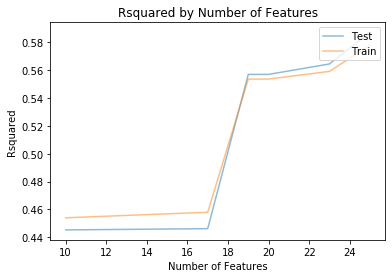

In [365]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
#Fit the models
cutoffs = [50000, 25000, 10000, 9000, 8000, 5000, 4000, 3900, 3860, 3840, 3830, 3820]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [367]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

25
0.5871787930611788
0.5778861443443357


In [368]:
#check the contribution of each feature

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
2,bathrooms,18.477399,18.477399
1,accommodates,12.961490,12.961490
3,bedrooms,12.637531,12.637531
19,review_scores_value,-11.536554,11.536554
18,review_scores_location,10.114406,10.114406
16,review_scores_checkin,-5.429414,5.429414
14,review_scores_accuracy,3.957188,3.957188
17,review_scores_communication,3.689397,3.689397
21,reviews_per_month,-3.639158,3.639158
4,beds,-2.522137,2.522137


Text(0, 0.5, 'Coefficient')

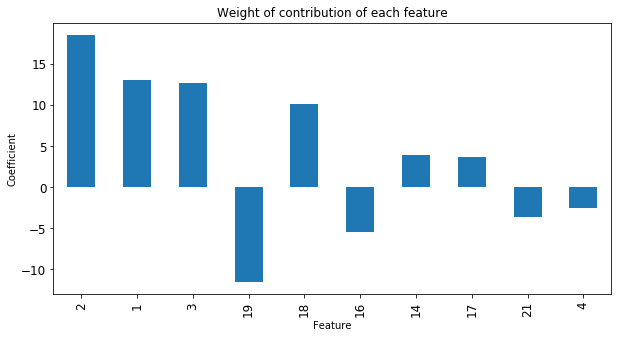

In [405]:
coef_df_plt = coef_df.head(10)['coefs']
coef_df_plt.plot(kind='bar', figsize= [10,5], fontsize =12, legend=False);
plt.title('Weight of contribution of each feature')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

From the linear regression modeling above we can see that the listing price is affected by:

- Number of bathrooms: listed accomodation with higher price has more bathrooms. 
- Number of people that can be accommodated: More people the listed place can accomodates, the higher the price is.
- Number of bedrooms: Again, more bedrooms increase the price.
- Review_scores_value: It is strange that the higher score the lower the price is.
- Review_scores_location: the higher the value is the higher the price.

## **Data Evaluation**

In this notebook, I analyzed three datasets from Seattle Airbnb listings. In conclusion, I was able to answer the following three questions:

**1) What is the most expensive month to book accommodation in Seattle?**

    It is generally the most expensive to book accomodation through Airbnb during the summer time, in particular, August, July and June. It is cheapest to book in winter.

**2) Does availability contribute to the price?**

    In certain period of time, namely after 2016/07, the low availability contributes to the higher price.

**3) What contributes to a house listed with high price?**

    Number of bathrooms, number of people that can be accommodated, number of bedrooms, review_scores_value, review_scores_location.